Project Title :- 
Smart Flood Early Warning and Risk Management System

Problem Statement :- 
Floods are occurring more often and with greater intensity because of climate change. Many areas still do not have effective early warning systems. We need a reliable solution to predict risks and send timely alerts to help reduce the impacts of disasters.

Description :-
This project aims to predict flood risks using past data, including rainfall, temperature, soil moisture, and river discharge. It estimates future water levels by classifying results into safe, alert, or danger zones. This approach supports climate change response and disaster management with early warning and preparedness measures.

In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib

In [3]:
#Load the dataset
df = pd.read_csv("flood.csv")

📌 First 5 rows:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  Coasta

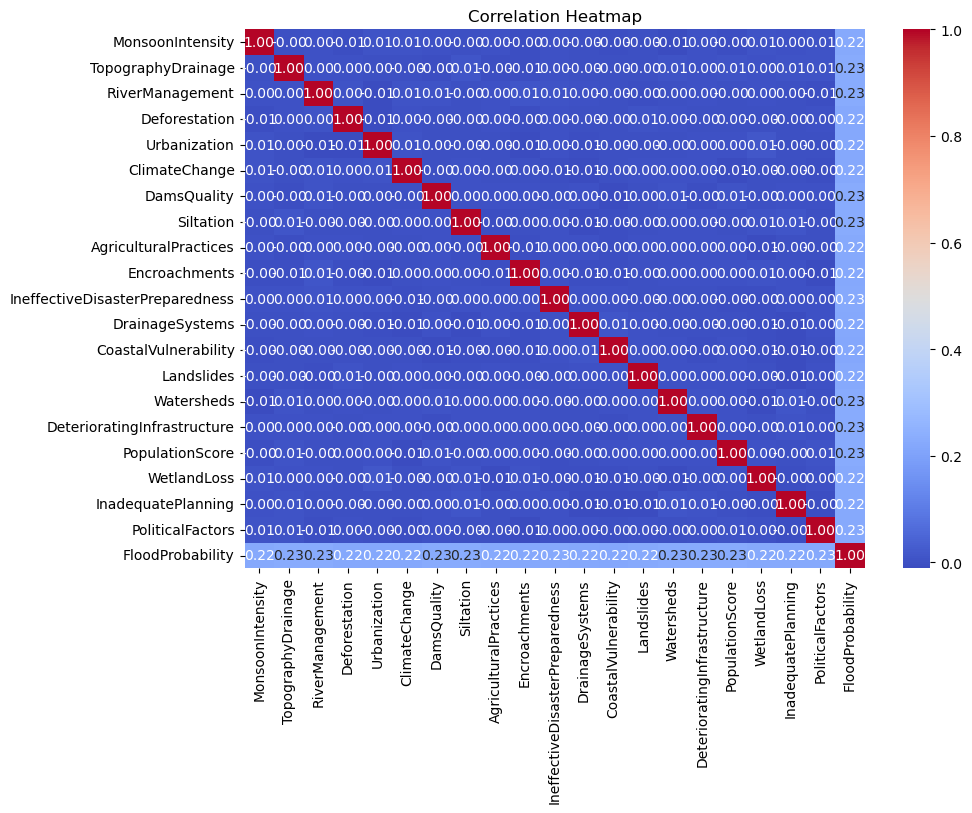

In [5]:
#Exploratory Data Analysis
print("📌 First 5 rows:")
print(df.head())

print("\nℹ️ Dataset Info:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

print("\n❓ Missing Values:")
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Data Transformation 
# Fill missing values (if any)
df.fillna(df.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["FloodProbability"]))

# Replace with scaled
X = pd.DataFrame(scaled_features, columns=df.drop(columns=["FloodProbability"]).columns)
y = df["FloodProbability"]

In [7]:
# Feature Selection 
print("\n🔍 Correlation with target (FloodProbability):")
print(df.corr()["FloodProbability"].sort_values(ascending=False))


🔍 Correlation with target (FloodProbability):
FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Name: FloodProbability, dtype

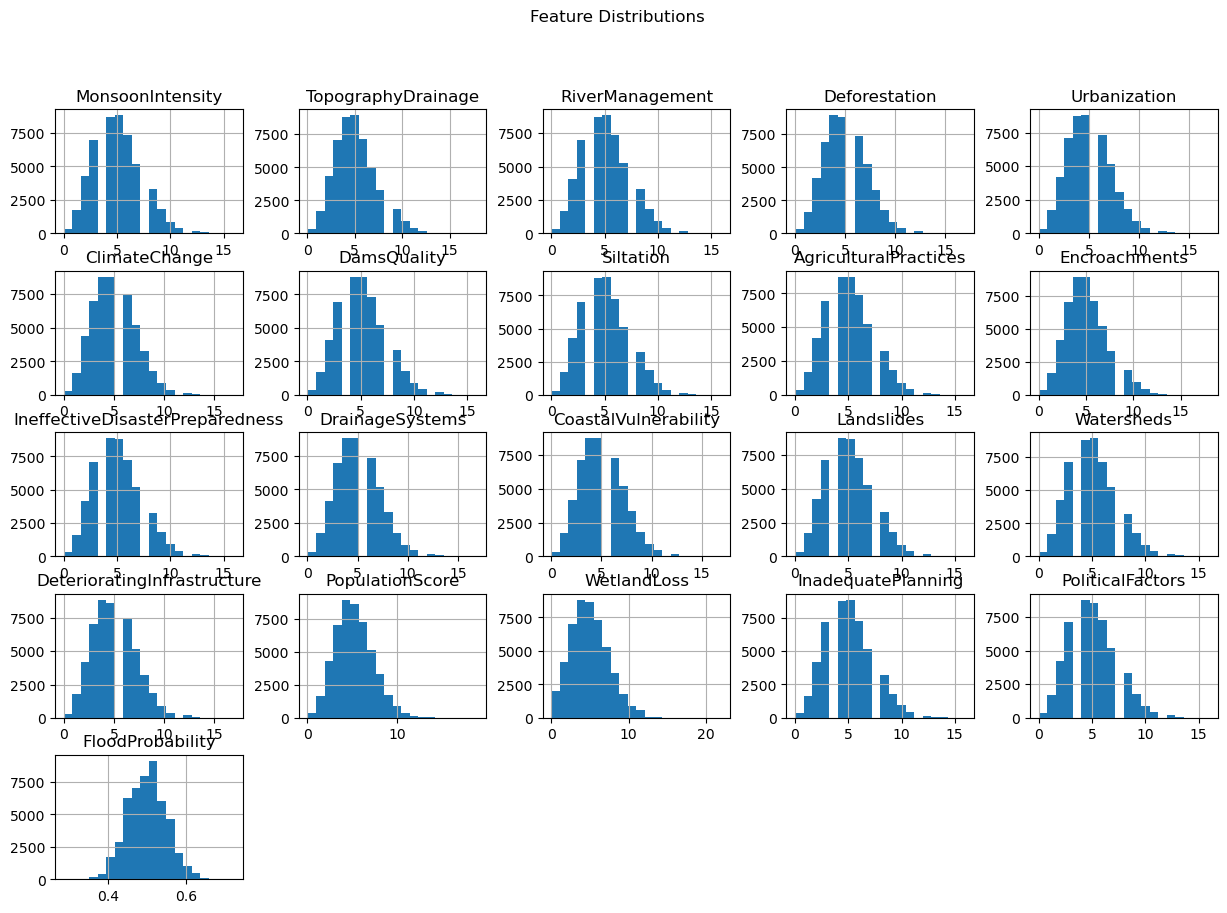

In [8]:
#Univariate Analysis
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

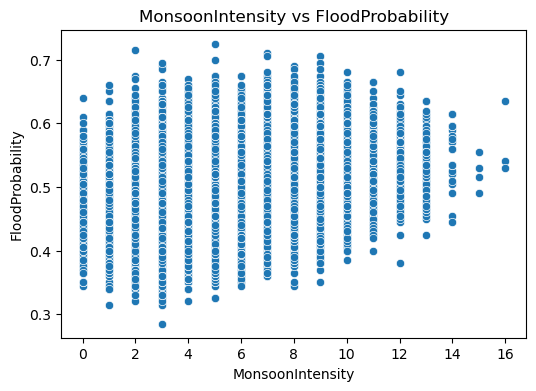

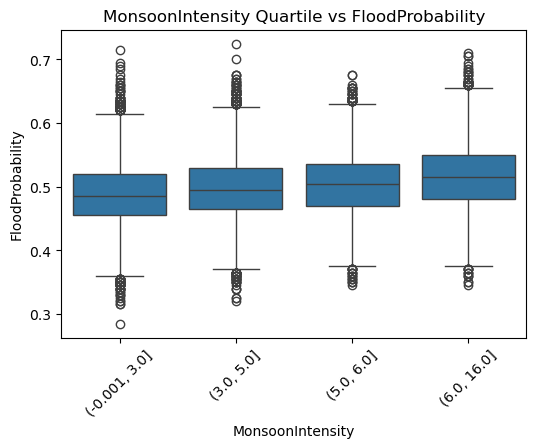

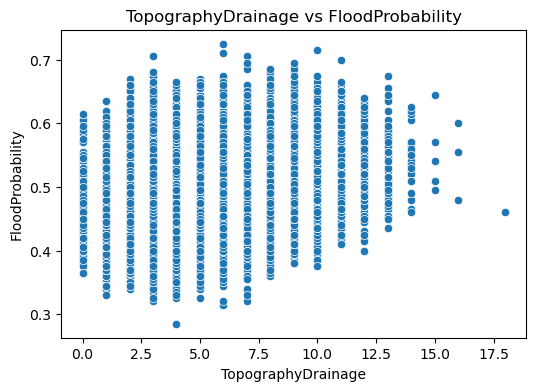

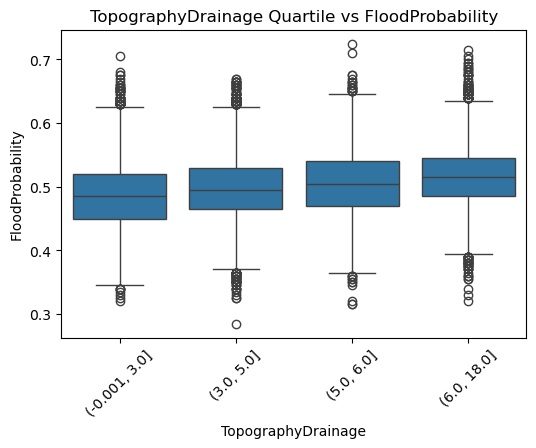

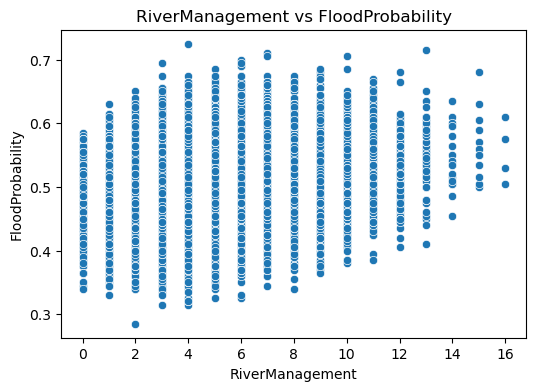

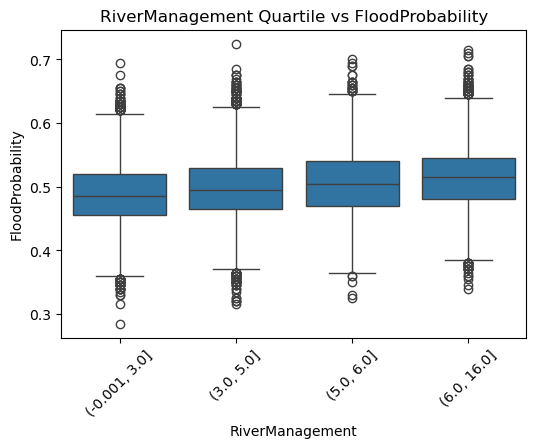

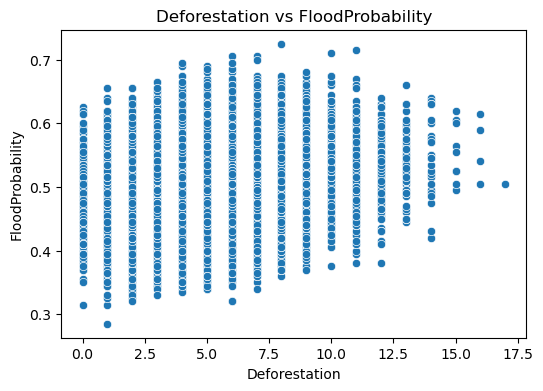

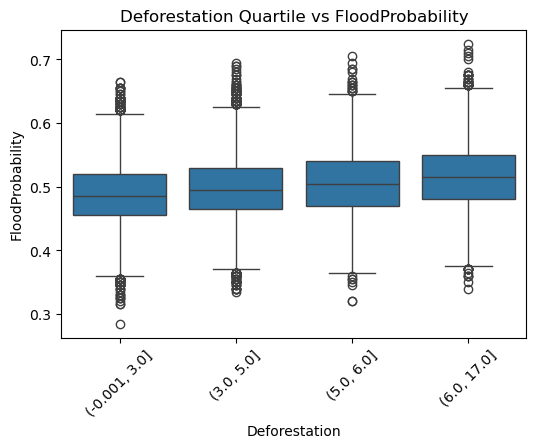

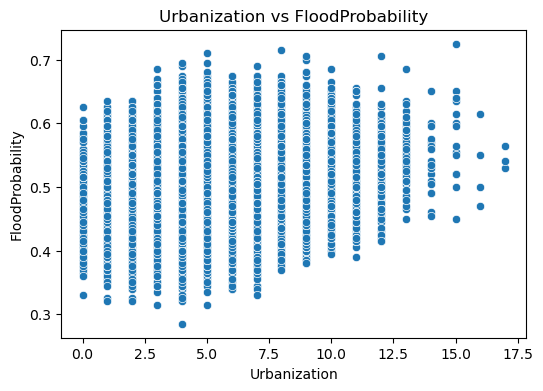

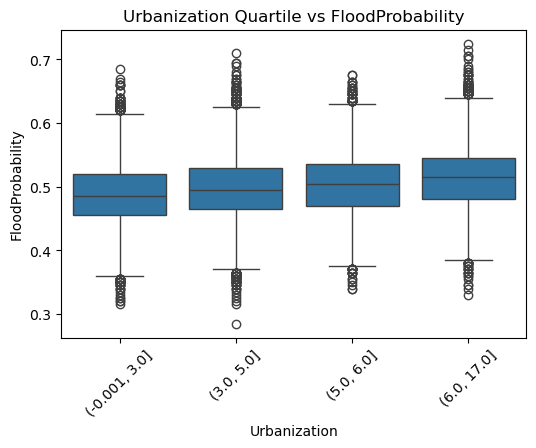

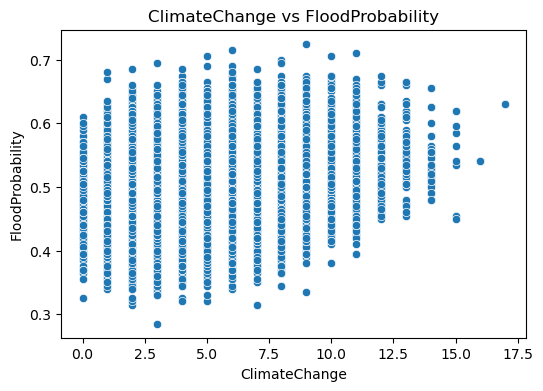

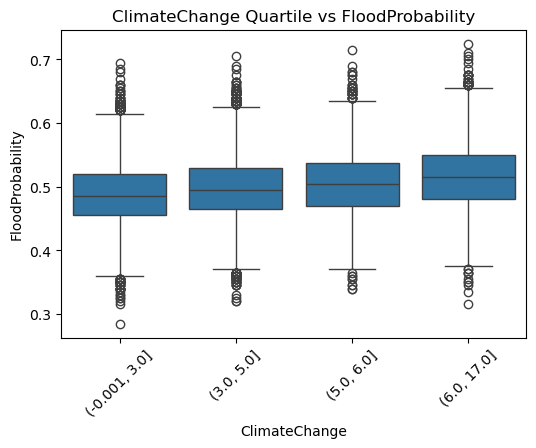

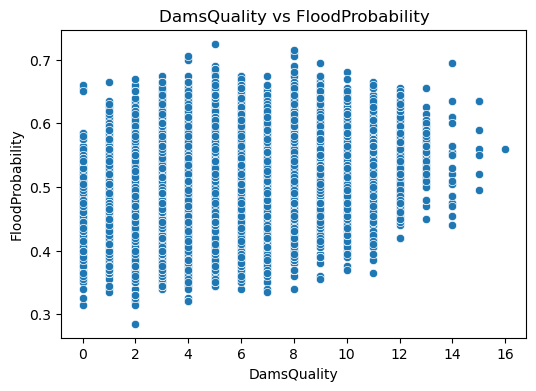

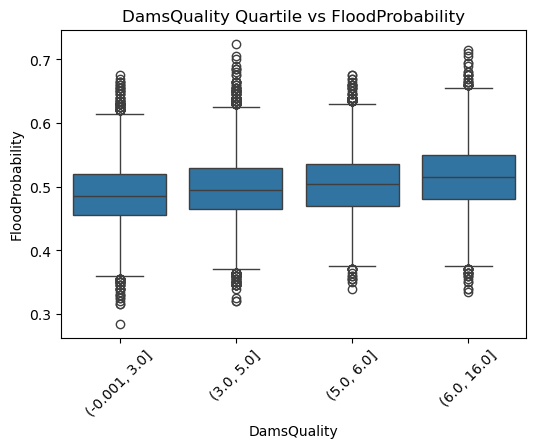

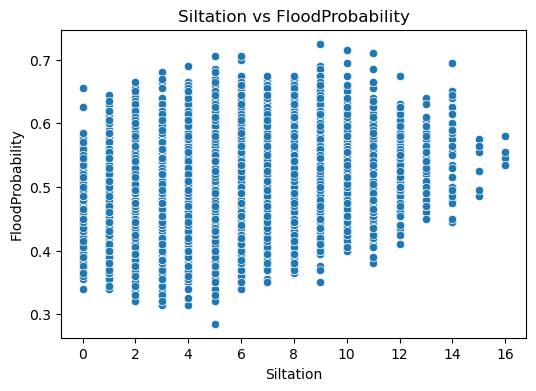

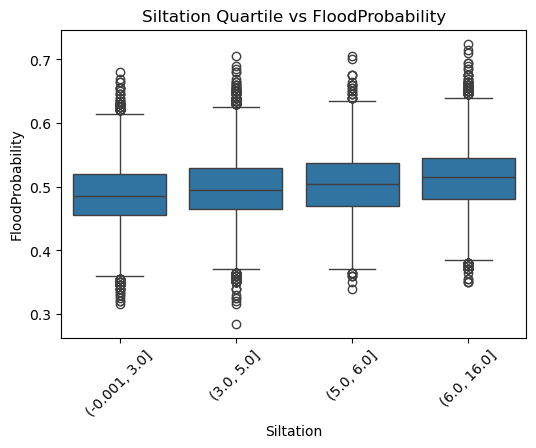

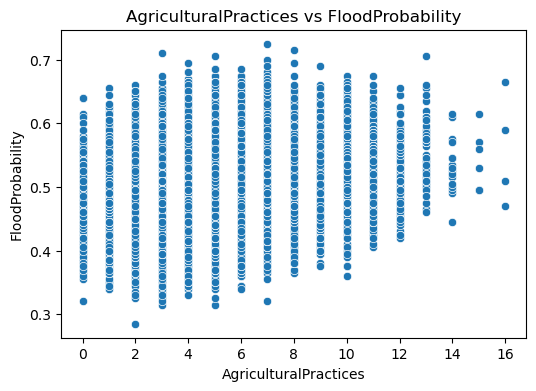

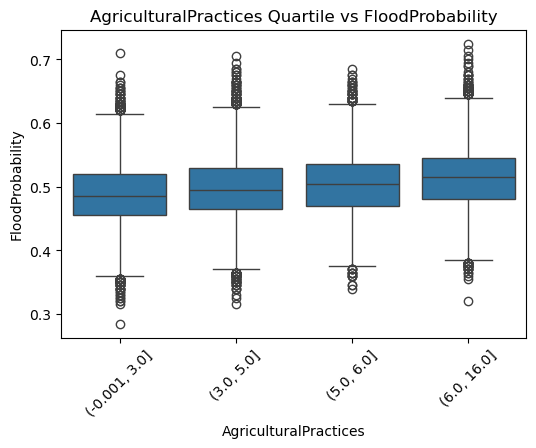

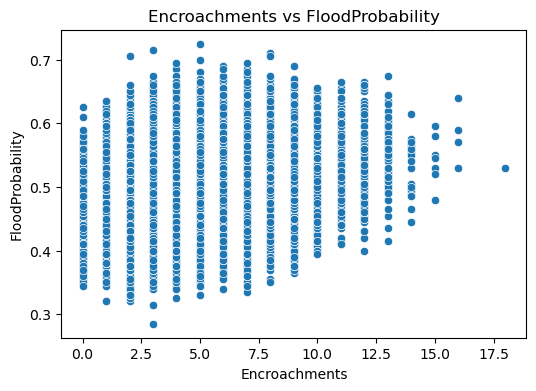

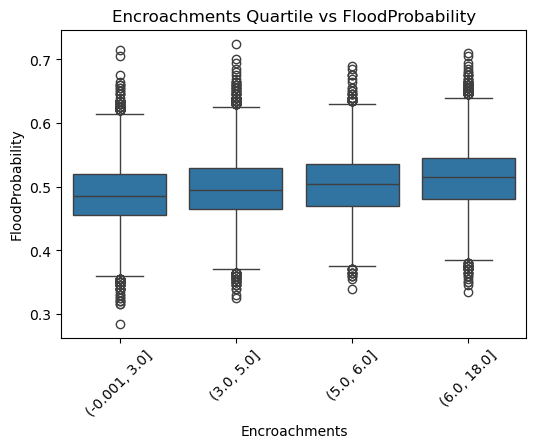

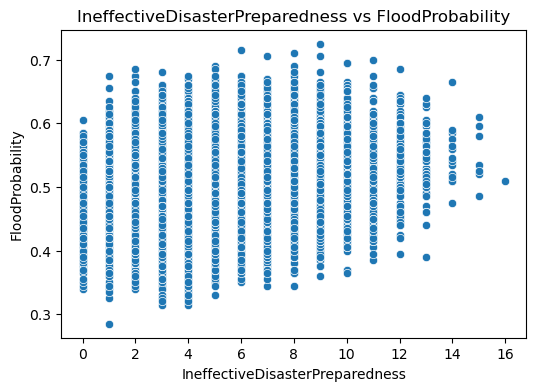

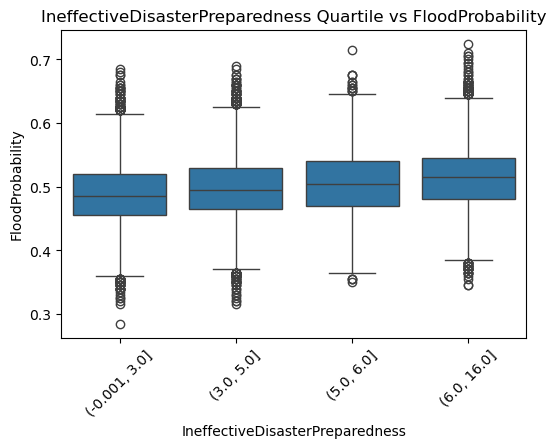

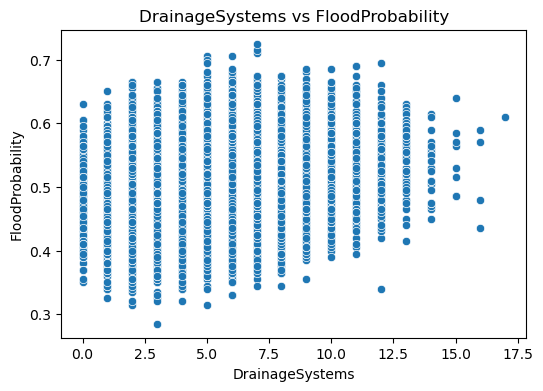

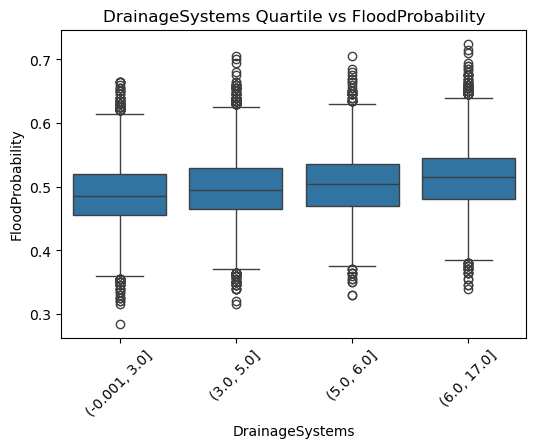

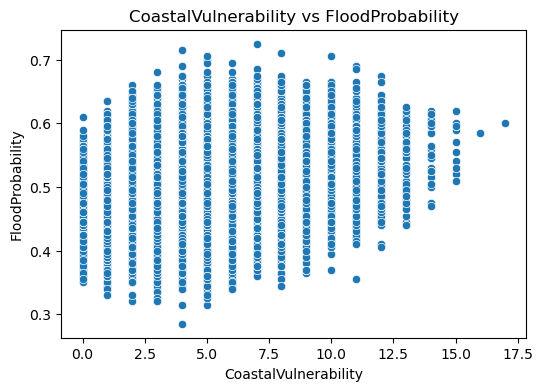

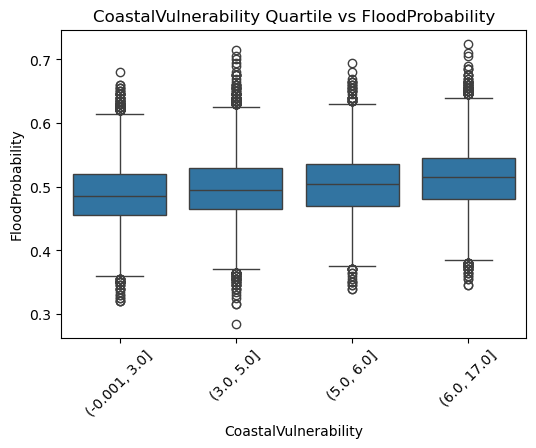

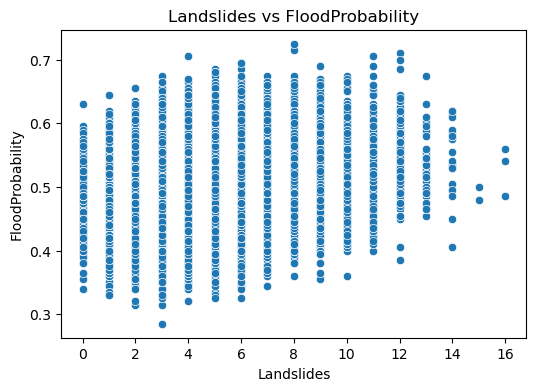

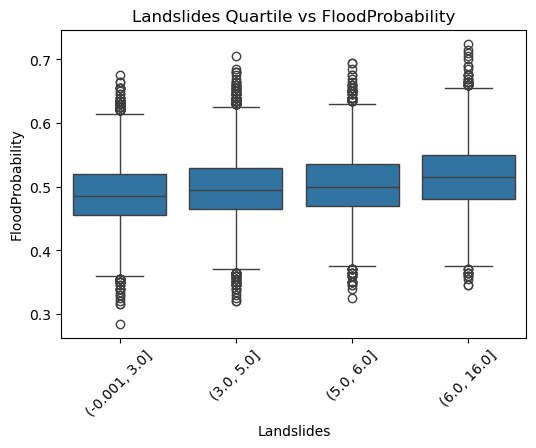

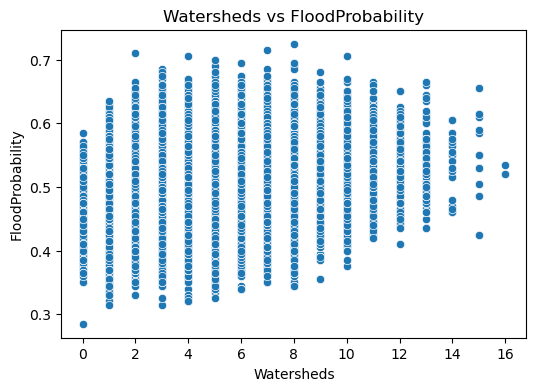

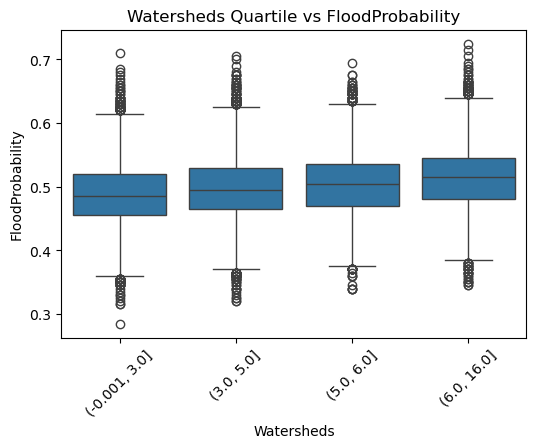

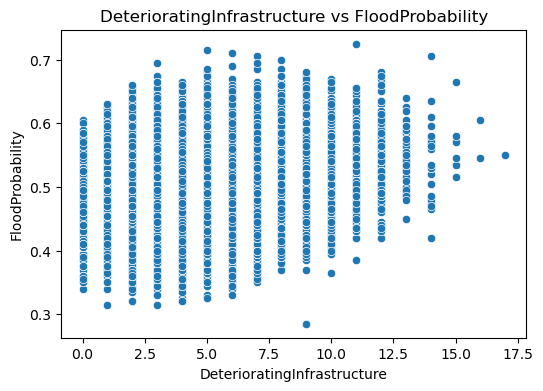

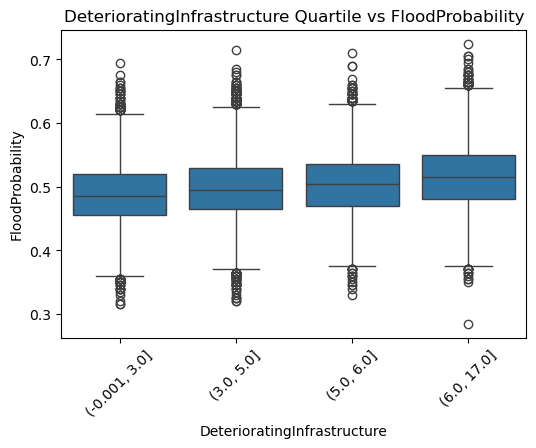

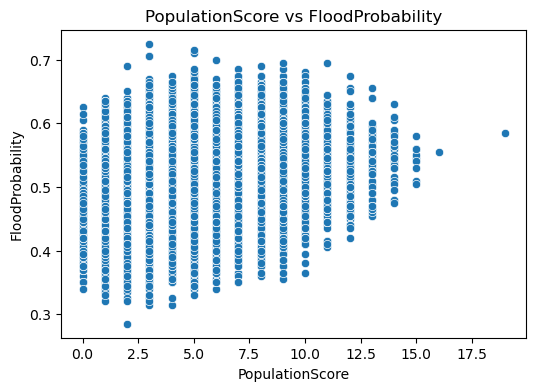

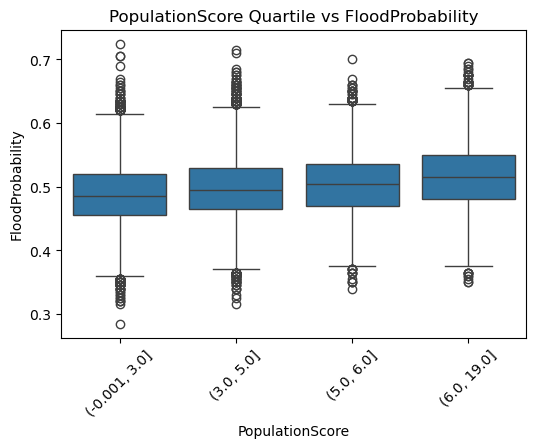

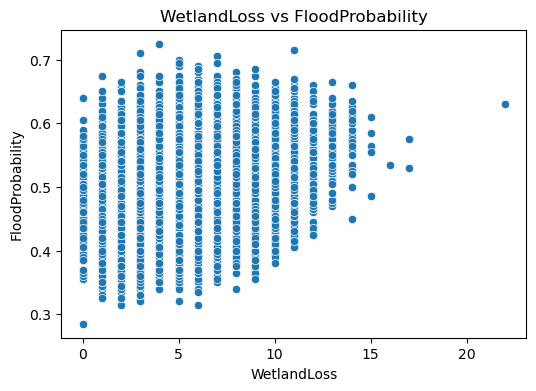

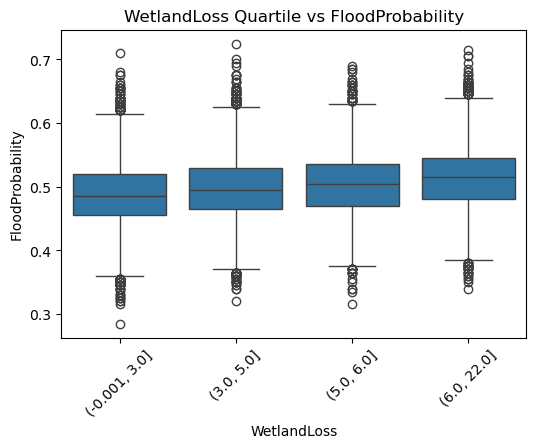

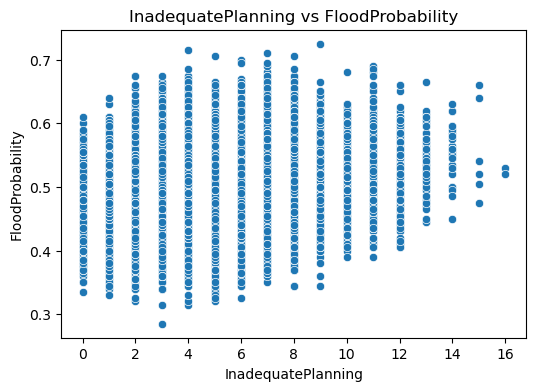

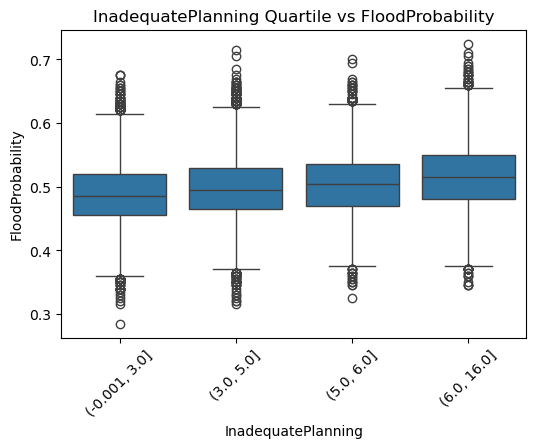

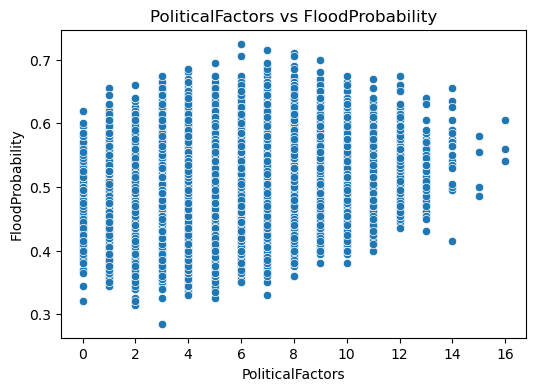

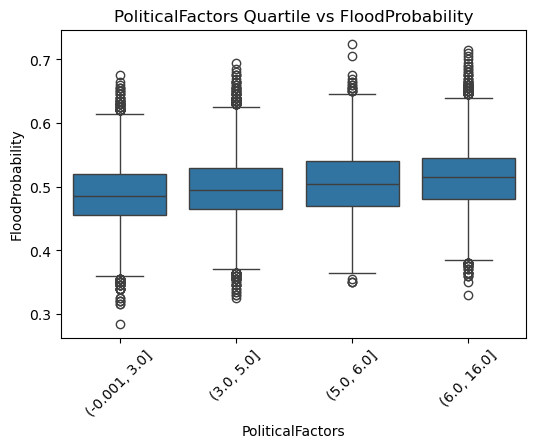

In [9]:
#Bivariate Analysis
for col in num_cols:
    if col != "FloodProbability":
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df["FloodProbability"])
        plt.title(f"{col} vs FloodProbability")
        plt.show()

        plt.figure(figsize=(6,4))
        sns.boxplot(x=pd.qcut(df[col], q=4, duplicates="drop"), y=df["FloodProbability"])
        plt.title(f"{col} Quartile vs FloodProbability")
        plt.xticks(rotation=45)
        plt.show()

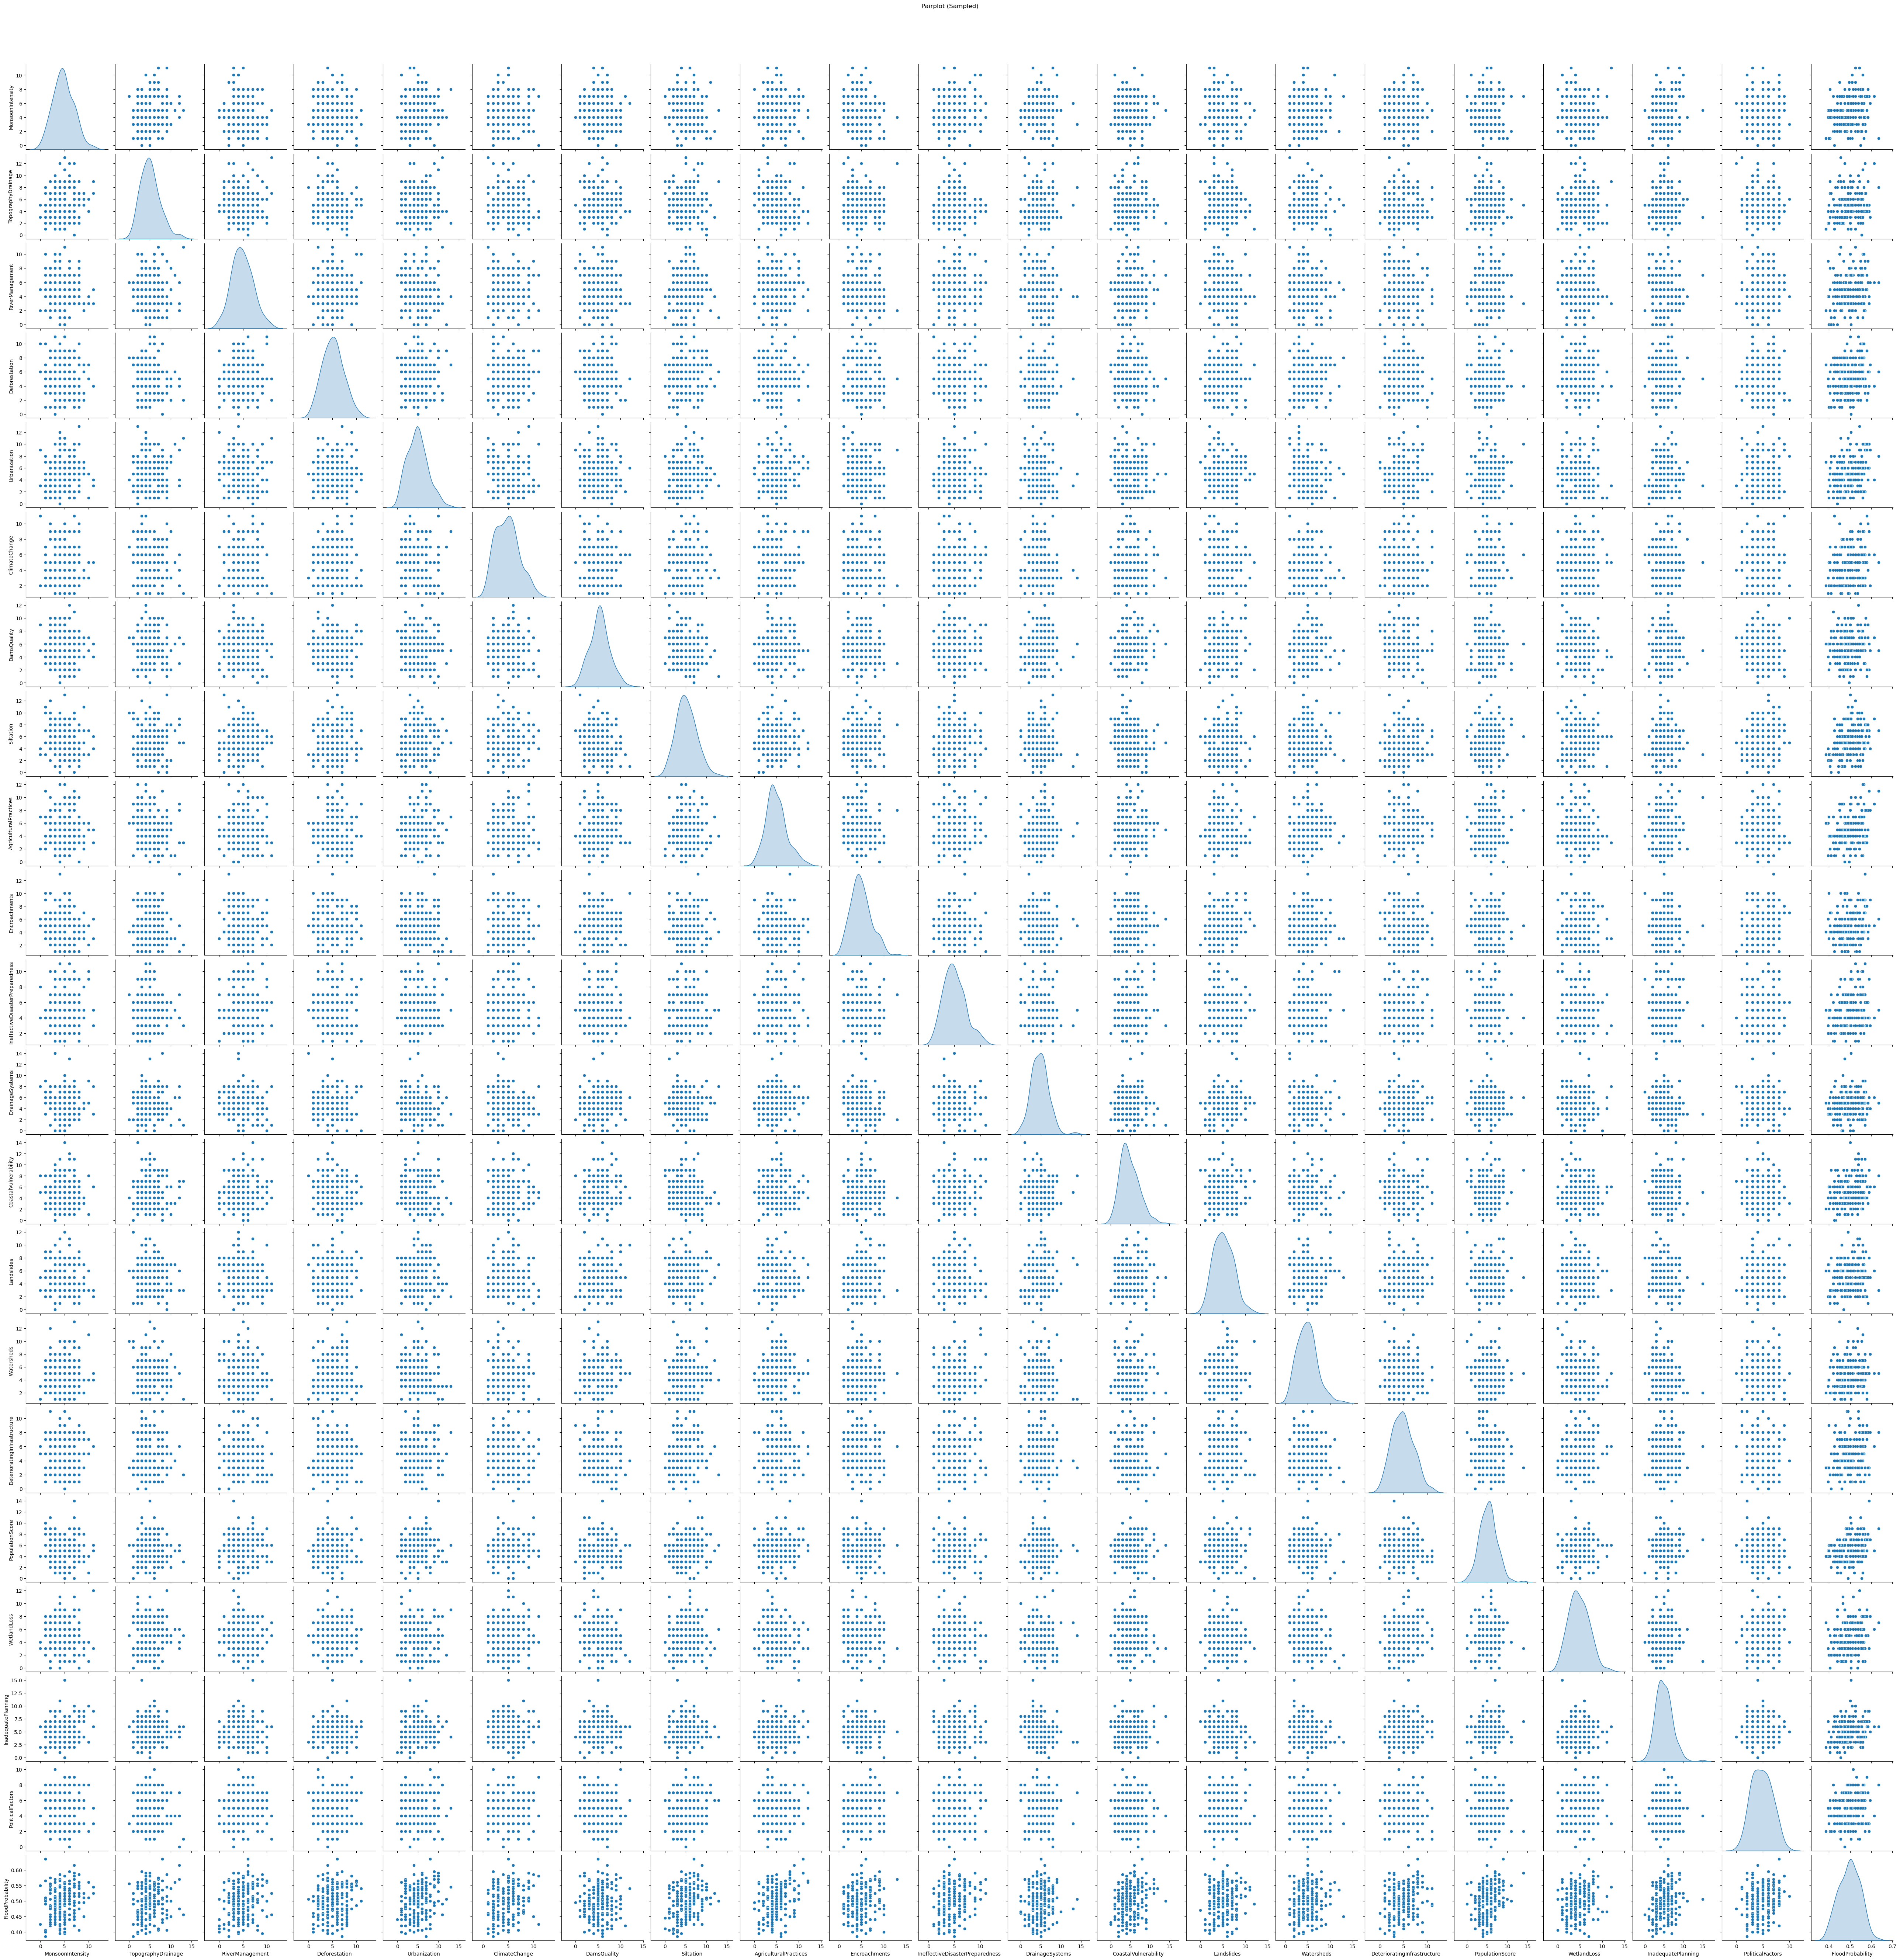

In [13]:
#Multivariate Analysis
sns.pairplot(df[num_cols].sample(min(200, len(df))), diag_kind="kde")
plt.suptitle("Pairplot (Sampled)", y=1.02)
plt.show()

In [10]:
#Data Preparation
df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["FloodProbability"]))

X = pd.DataFrame(scaled_features, columns=df.drop(columns=["FloodProbability"]).columns)
y = df["FloodProbability"]

In [11]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Model Tuning & Optimisation 
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("\n✅ Best Parameters from GridSearchCV:", grid.best_params_)
model = grid.best_estimator_


✅ Best Parameters from GridSearchCV: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}



🌟 Feature Importance:
TopographyDrainage                 0.052860
DamsQuality                        0.052757
PoliticalFactors                   0.052507
PopulationScore                    0.051877
RiverManagement                    0.051485
IneffectiveDisasterPreparedness    0.051459
DeterioratingInfrastructure        0.050883
AgriculturalPractices              0.050845
Landslides                         0.050757
Watersheds                         0.050444
Siltation                          0.050332
Deforestation                      0.049589
WetlandLoss                        0.049530
Urbanization                       0.048594
MonsoonIntensity                   0.048486
ClimateChange                      0.048101
DrainageSystems                    0.048000
InadequatePlanning                 0.047673
CoastalVulnerability               0.046916
Encroachments                      0.046905
dtype: float64


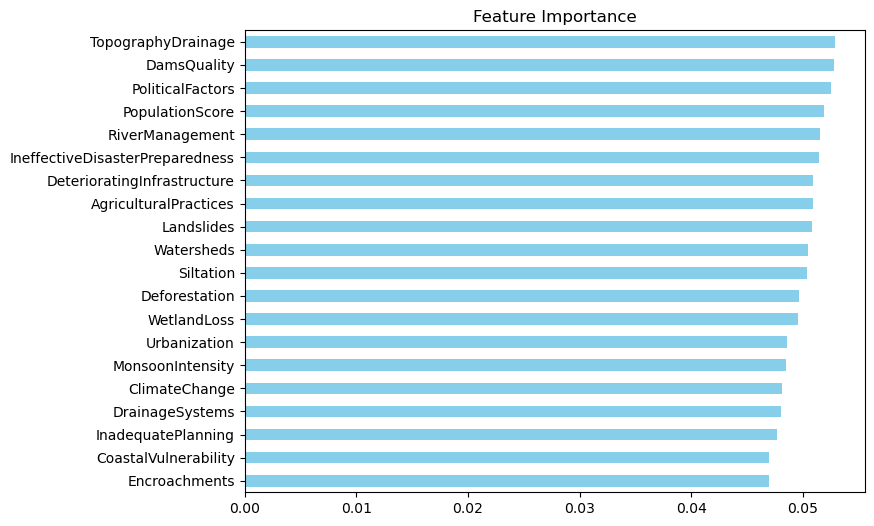

In [13]:
#Model Training 
model.fit(X_train,y_train)
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
print("\n🌟 Feature Importance:")
print(importances.sort_values(ascending=False))

plt.figure(figsize=(8,6))
importances.sort_values().plot(kind="barh", color="skyblue")
plt.title("Feature Importance")
plt.show()


In [14]:
#Predictions 
y_pred = model.predict(X_test)
lower = y_pred * 0.9
upper = y_pred * 1.1

In [15]:
#Flood Risk Classification
danger_level = 0.7
def classify_risk(pred):
    if pred < danger_level * 0.9:
        return "Safe"
    elif danger_level * 0.9 <= pred < danger_level:
        return "⚠ Alert"
    else:
        return "🔴 Danger"

y_test_class = [classify_risk(val) for val in y_test]
y_pred_class = [classify_risk(p) for p in y_pred]

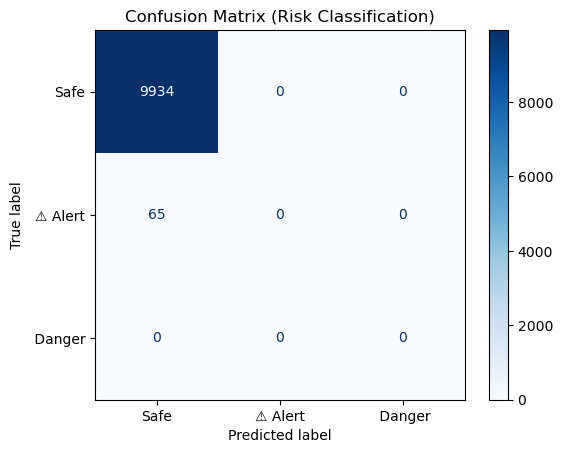

In [21]:
#Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class, labels=["Safe", "⚠ Alert", " Danger"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Safe", "⚠ Alert", " Danger"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Risk Classification)")
plt.show()

In [17]:
#Evaluation 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\n📊 Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


📊 Model Evaluation:
RMSE: 0.03
R²: 0.73


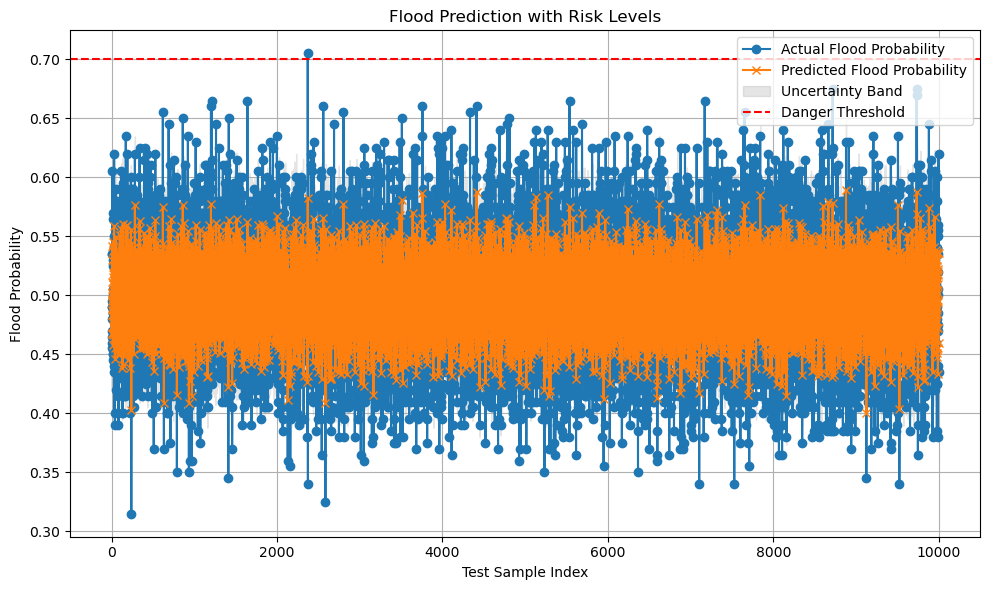

In [18]:
#Visualization 
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label="Actual Flood Probability", marker="o")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Flood Probability", marker="x")
plt.fill_between(range(len(y_pred)), lower, upper, color="gray", alpha=0.2, label="Uncertainty Band")
plt.axhline(danger_level, color="red", linestyle="--", label="Danger Threshold")
plt.xlabel("Test Sample Index")
plt.ylabel("Flood Probability")
plt.title("Flood Prediction with Risk Levels")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
#save model and scaler
joblib.dump(model,"flood_model.pkl")
joblib.dump(scaler,"scaler.pkl")
print("Model and Scaler saved sucessfully")


Model and Scaler saved sucessfully
